# HG data

In [128]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
import os
import sys
import glob
import time
import warnings
import datetime 
import matplotlib.dates as mdates
print("Last updated on ", time.asctime())

Last updated on  Thu May 21 19:02:46 2020


In [130]:
import numpy as np
import pandas as pd
import matplotlib

In [4]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [298]:
from c19.data_functions_HG import hg_get_data_ingresos, hg_get_data_pacientes, hg_get_data_age
from c19.HG_analysis import plot_hgi, plot_nh_nu, recovery_time, exitus_time, exitus_group, exitus, hosp_uci, select_age_by_CA_and_sex
from c19.HG_analysis import hist_XY_series, plot_XY_series, plot_pop_age

In [173]:
datapath="/Users/jjgomezcadenas/Projects/Development/C19/data/HospitalesGalicia"
file = "IngresosCovid.csv"
filep = "PacientesCOVID.csv"
ff =f'{datapath}/{file}'
fp =f'{datapath}/{filep}'
dfi = pd.read_csv(ff, sep='|')

In [174]:
hgi =hg_get_data_ingresos(ff)

In [175]:
hgi.head()

,pacienteID,ingreso,alta,hosp
0,8,2020-03-18,2020-03-26,HOS
1,9,2020-03-29,2020-04-24,HOS
2,10,2020-03-27,2020-04-07,HOS
3,10,2020-04-14,2020-04-30,HOS
4,12,2020-03-23,2020-04-09,HOS


In [179]:
nps = hgi.groupby(['ingreso']).pacienteID.count()

In [290]:
nps.tail()

ingreso
2020-05-03    12
2020-05-04    24
2020-05-05    23
2020-05-06    28
2020-05-07    20
Name: pacienteID, dtype: int64

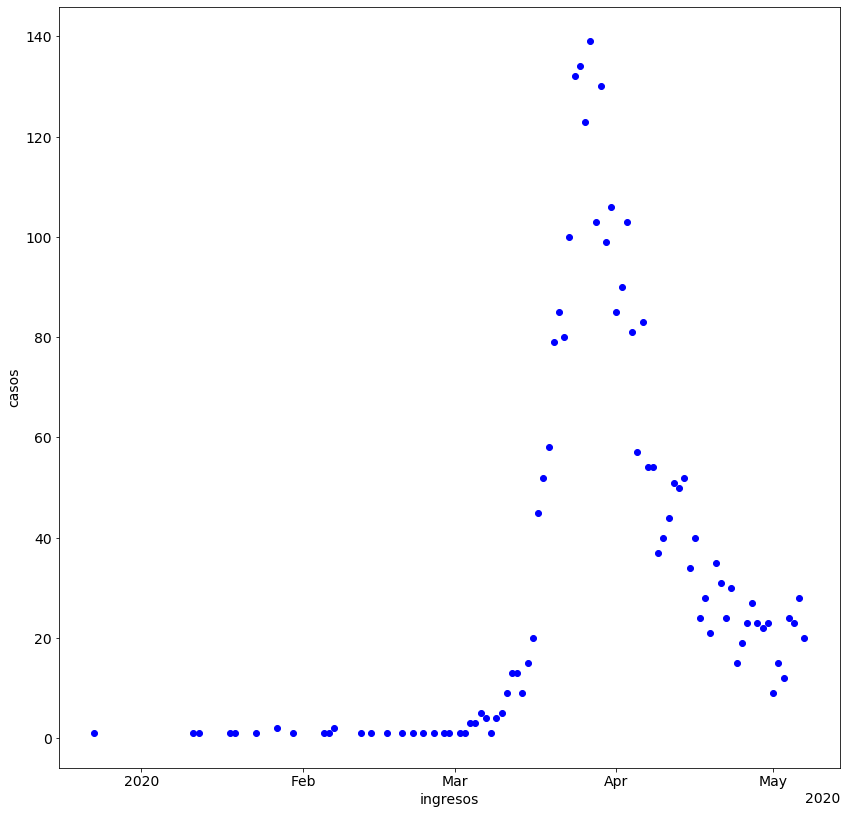

In [181]:
plot_hgi(nps, figsize=(14,14))

In [184]:
tR = recovery_time(hgi)

(array([392., 525., 593., 487., 355., 205., 150.,  83.,  76., 158.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

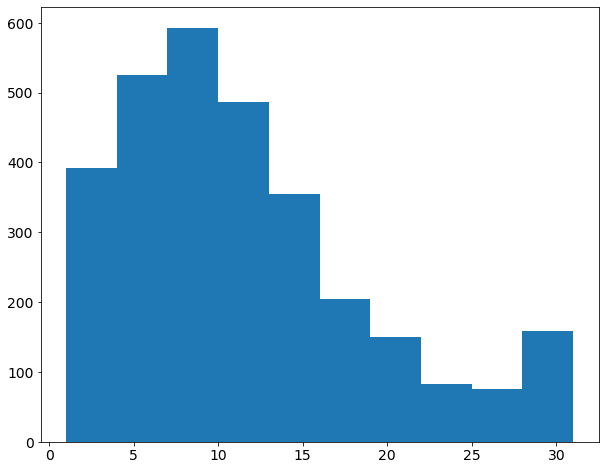

In [185]:
plt.hist(tR)

In [187]:
tD, nH, nU = hosp_uci(hgi) 

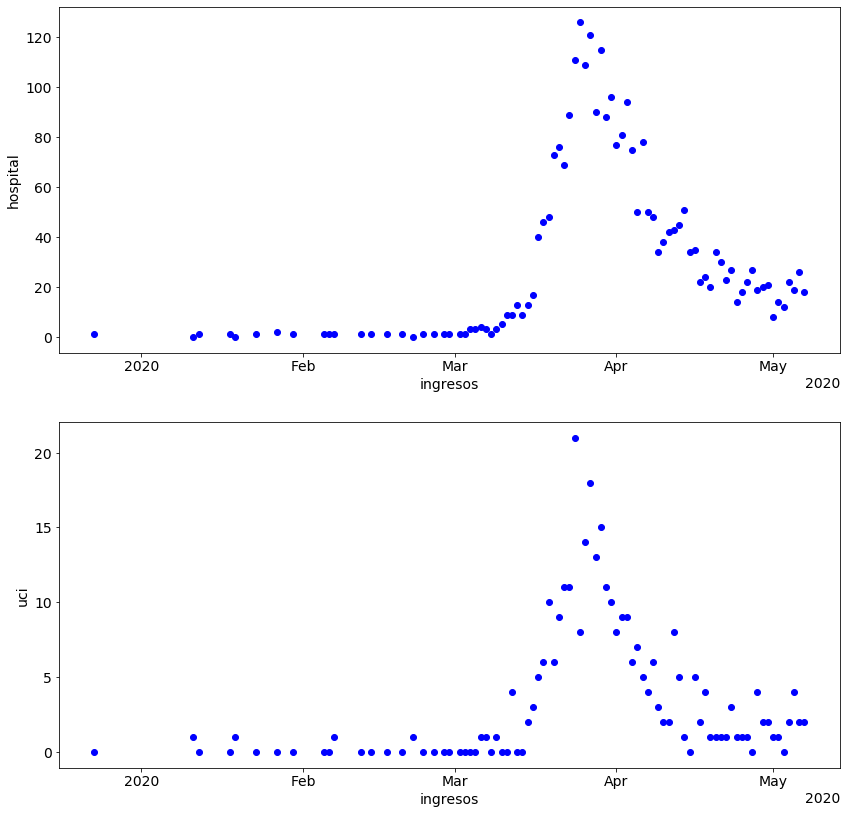

In [189]:
plot_nh_nu(tD, nH, nU, figsize=(14,14))

In [300]:
dfp = pd.read_csv(fp, sep='|')
dfp.head()

,Paciente,Ingreso,Edad,Sexo,Alta,Code,Registro,ZIP,Unnamed: 8
0,1,25/03/2020,102,Mujer,30/03/2020,EXITUS,"A.S. OURENSE, VERIN E O BARCO",32633.0,NaN
1,2,27/03/2020,101,Mujer,31/03/2020,EXITUS,A.S. VIGO,36205.0,NaN
2,3,27/03/2020,100,Mujer,19/04/2020,EXITUS,"A.S. OURENSE, VERIN E O BARCO",32800.0,NaN
3,4,01/04/2020,99,Mujer,24/04/2020,EXITUS,A.S. A CORU�A E CEE,15009.0,NaN
4,5,28/03/2020,99,Mujer,05/04/2020,EXITUS,"A.S. OURENSE, VERIN E O BARCO",32710.0,NaN


In [301]:
dfp = hg_get_data_pacientes(fp)

In [302]:
dfp.head()

,pacienteID,ingreso,alta,edad,sexo,code
0,1,2020-03-25,2020-03-30,102,Mujer,EXITUS
1,2,2020-03-27,2020-03-31,101,Mujer,EXITUS
2,3,2020-03-27,2020-04-19,100,Mujer,EXITUS
3,4,2020-04-01,2020-04-24,99,Mujer,EXITUS
4,5,2020-03-28,2020-04-05,99,Mujer,EXITUS


In [303]:
dfp.tail()

,pacienteID,ingreso,alta,edad,sexo,code
10449,10450,2020-04-25,2030-01-01,17,Hombre,NaN
10450,10451,2020-04-25,2030-01-01,18,Hombre,NaN
10451,10452,2020-04-23,2030-01-01,71,Hombre,NaN
10452,10453,2020-04-29,2030-01-01,44,Hombre,NaN
10453,10454,2020-05-02,2030-01-01,34,Mujer,NaN


In [292]:
def exitus_group(dfp):
    df    = dfp.loc[dfp.code == "EXITUS", ('pacienteID', 'ingreso', 'alta', 'edad', 'sexo')]
    return df

In [293]:
dfe = exitus_group(dfp)

In [295]:
dfe.tail()

,pacienteID,ingreso,alta,edad,sexo
539,540,2020-04-07,2020-04-17,84,Hombre
540,541,2020-03-23,2020-03-24,85,Hombre
541,542,2020-04-07,2020-03-15,81,Hombre
542,543,2020-03-19,2020-04-11,73,Mujer
543,544,2020-03-23,2020-03-31,78,Hombre


In [305]:
thE = exitus_time(dfp, sexo='Hombre')

(array([55., 68., 56., 40., 20., 19., 20.,  9., 11.,  9.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

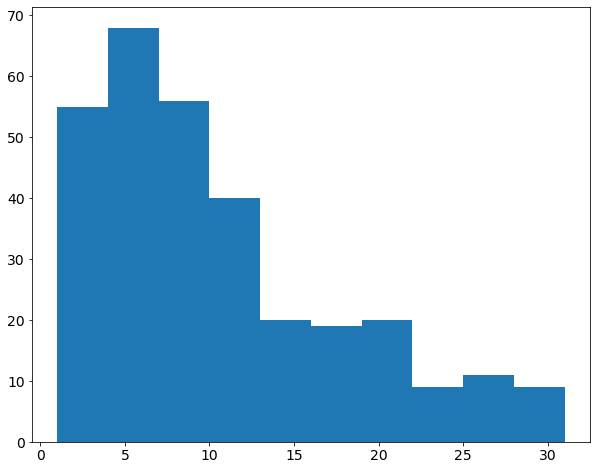

In [306]:
plt.hist(thE)

In [307]:
tmE = exitus_time(dfp, sexo='Mujer')

(array([34., 42., 38., 49., 15., 22.,  8., 12.,  6., 11.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

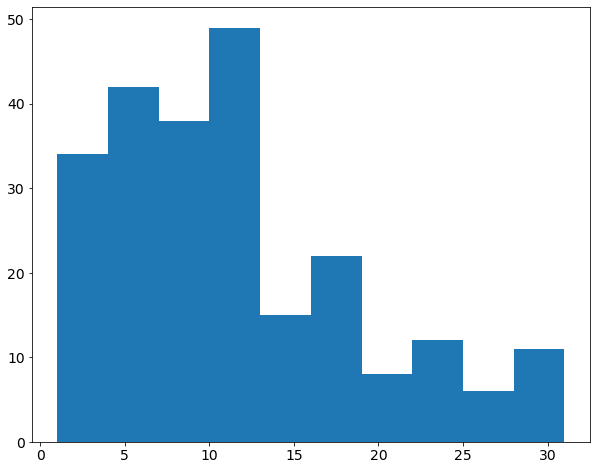

In [308]:
plt.hist(tmE)

In [309]:
tmA = exitus_time(dfp, sexo='all')

(array([ 89., 110.,  94.,  89.,  35.,  41.,  28.,  21.,  17.,  20.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

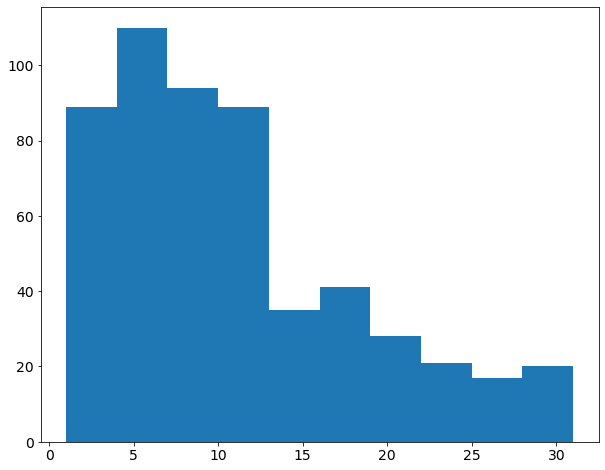

In [310]:
plt.hist(tmA)

In [311]:
ex = exitus(dfp, sexo='all',groupby='edad')

 exitus total = 544 fraction = 0.05203749760857088


In [312]:
dfc = exitus(dfp, sexo='all',groupby='ingreso', datestamp=True)

 exitus total = 544 fraction = 0.05203749760857088


In [313]:
dfc.head()

ingreso
2020-03-11    1
2020-03-12    1
2020-03-13    3
2020-03-15    3
2020-03-16    7
Name: pacienteID, dtype: int64

In [314]:
ex.head()

edad
35    1
37    2
45    2
48    1
50    2
Name: pacienteID, dtype: int64

In [315]:
dfc2 = exitus(dfp, sexo='all',groupby='ingreso', datestamp=False)

 exitus total = 544 fraction = 0.05203749760857088


In [316]:
dfc2.head()

0    1
1    1
2    3
3    3
4    7
dtype: int64

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


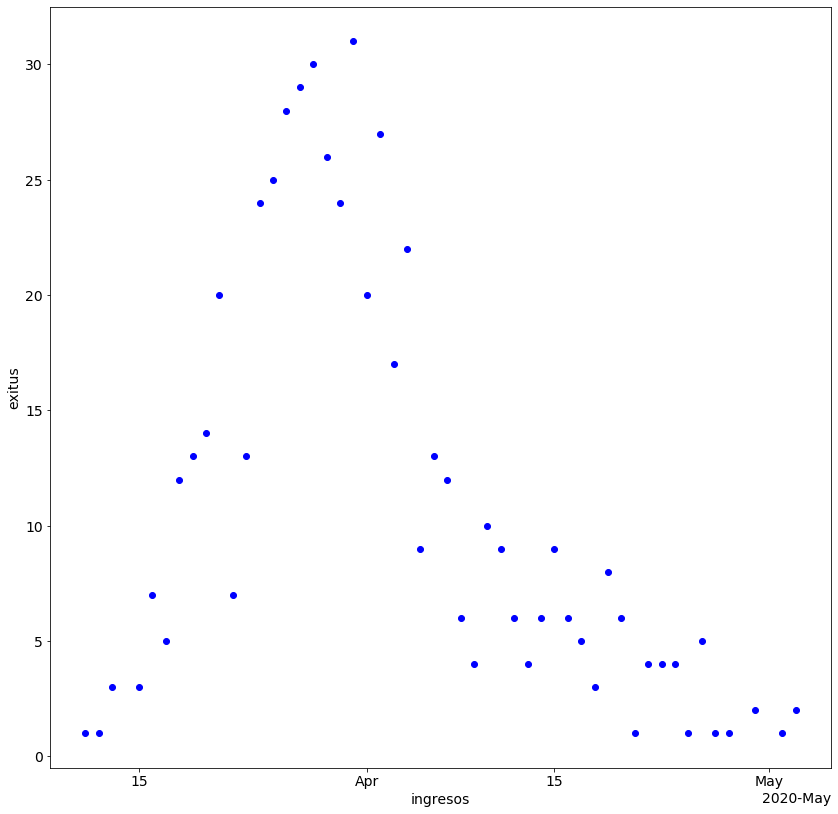

In [317]:
plot_XY_series(dfc,xlabel='ingresos',ylabel='exitus',figsize=(14,14))

[38.04545454545455, 44.13636363636364, 50.22727272727273, 56.31818181818181, 62.40909090909091, 68.5, 74.5909090909091, 80.68181818181817, 86.77272727272727, 92.86363636363636, 98.95454545454545]
[ 2.          2.          1.33333333  2.83333333  3.          7.
 11.         17.         26.         17.5         4.14285714]


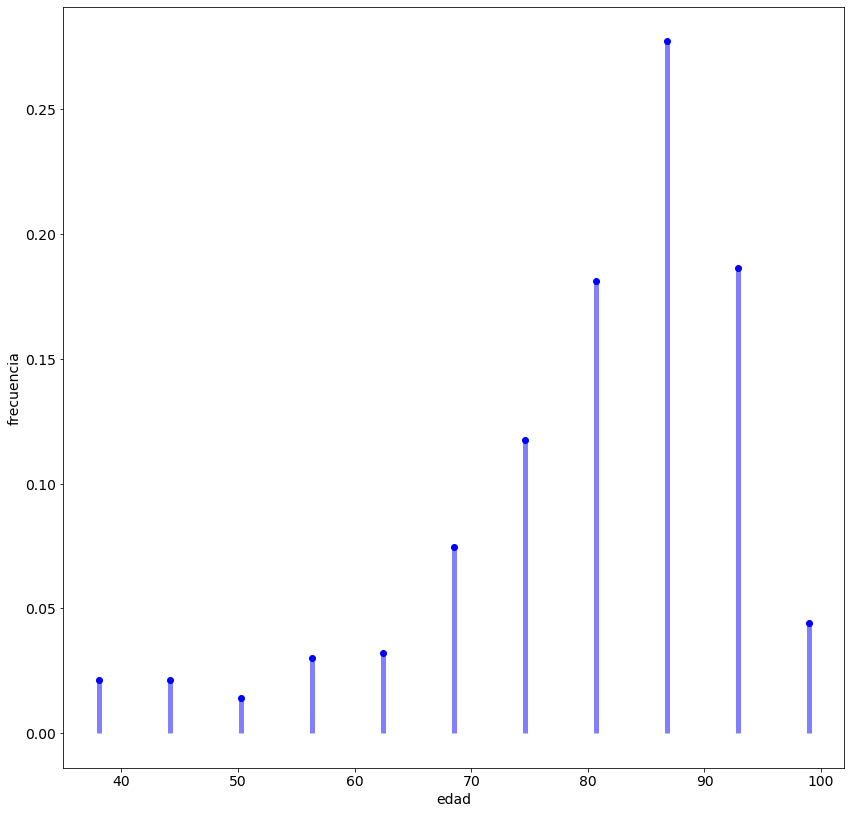

In [318]:
hist_XY_series(ex,xlabel='edad',ylabel='frecuencia', bins=12, figsize=(14,14))

[2.7777777777777777, 8.333333333333332, 13.888888888888888, 19.444444444444443, 25.0, 30.555555555555554, 36.11111111111111, 41.666666666666664, 47.22222222222222]
[ 3.8        13.16666667 27.2        24.16666667 12.4         6.5
  6.2         3.33333333  2.        ]


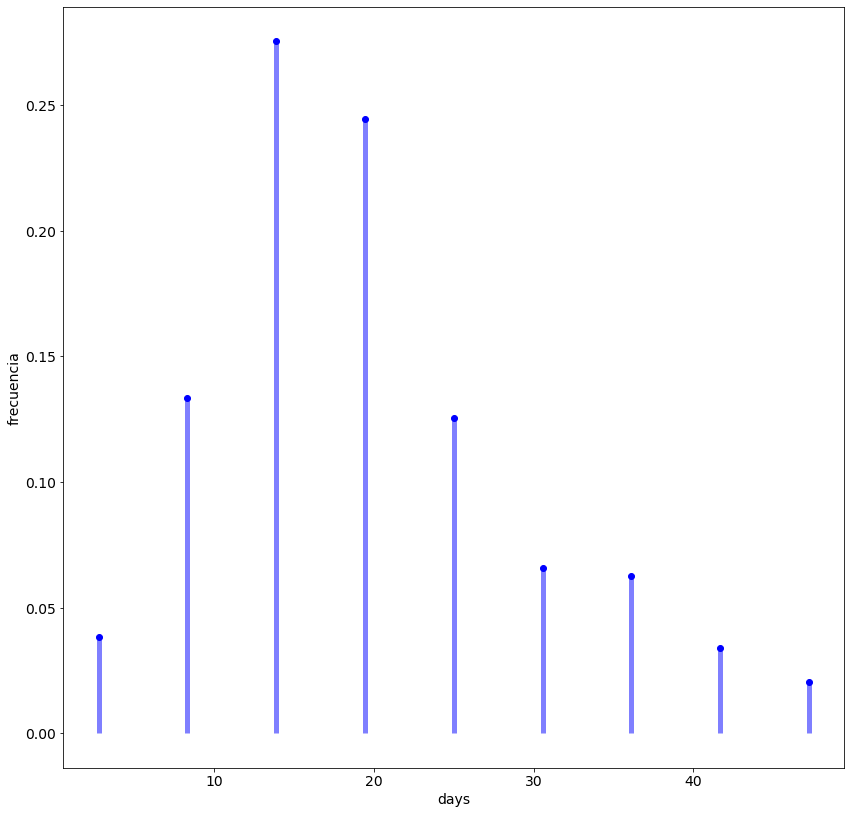

In [319]:
hist_XY_series(dfc2,xlabel='days',ylabel='frecuencia',figsize=(14,14))

# Read age data

In [279]:
datapath="/Users/jjgomezcadenas/Projects/Development/C19/data/"
file = "edad_poblacion.csv"
ff =f'{datapath}/{file}'
dfa = pd.read_csv(ff, sep=';')

In [228]:
dfa.head()

,Sexo,Comunidades y provincias,Edad (hasta 100 y más),Total
0,Ambos sexos,TOTAL ESPAÑA,Total,47.431.256
1,Ambos sexos,TOTAL ESPAÑA,0-4,1.974.809
2,Ambos sexos,TOTAL ESPAÑA,5-9,2.324.559
3,Ambos sexos,TOTAL ESPAÑA,10-14,2.522.754
4,Ambos sexos,TOTAL ESPAÑA,15-19,2.387.556


In [280]:
df = hg_get_data_age(ff)

In [281]:
df.head()

,sexo,ca,edad,poblacion
0,Ambos sexos,TOTAL ESPAÑA,Total,47.431.256
1,Ambos sexos,TOTAL ESPAÑA,0-4,1.974.809
2,Ambos sexos,TOTAL ESPAÑA,5-9,2.324.559
3,Ambos sexos,TOTAL ESPAÑA,10-14,2.522.754
4,Ambos sexos,TOTAL ESPAÑA,15-19,2.387.556


In [282]:
dfa = select_age_by_CA_and_sex(df, sexo='Ambos sexos',CA = 'TOTAL ESPAÑA')

In [283]:
dfa

,arange,amean,poblacion
0,"(0, 4)",2.0,1974809.0
1,"(5, 9)",7.0,2324559.0
2,"(10, 14)",12.0,2522754.0
3,"(15, 19)",17.0,2387556.0
4,"(20, 24)",22.0,2359591.0
5,"(25, 29)",27.0,2582946.0
6,"(30, 34)",32.0,2838372.0
7,"(35, 39)",37.0,3389813.0
8,"(40, 44)",42.0,3995052.0
9,"(45, 49)",47.0,3894528.0


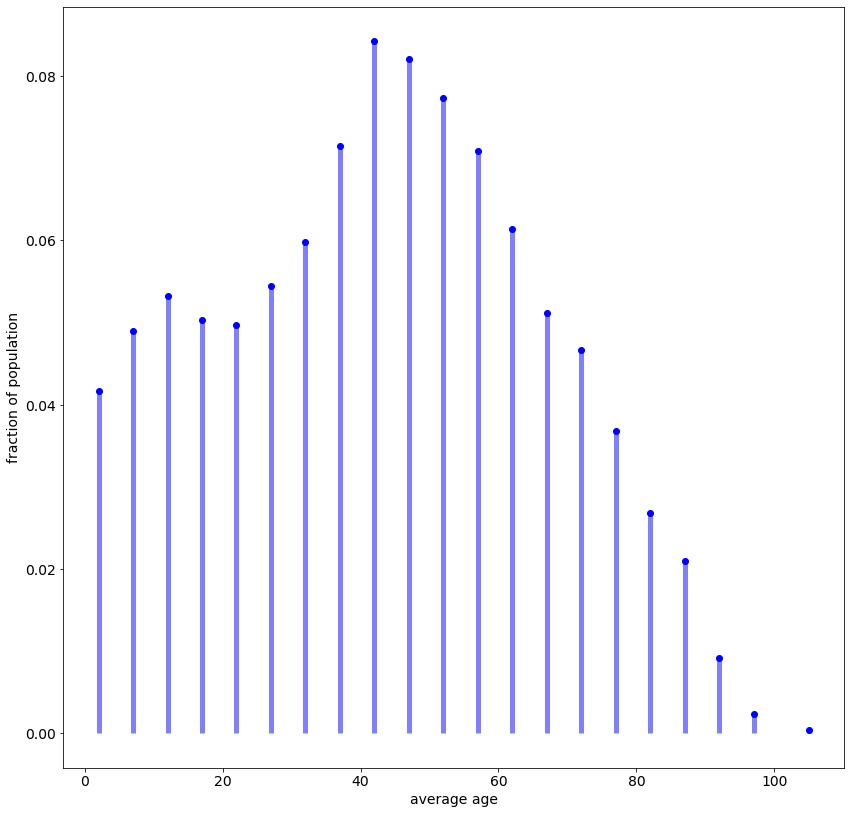

In [284]:
plot_pop_age(dfa, figsize=(14,14))